# Medical Cost Personal Datasets

Introduction:

Project is about estimating the Insurance costs for an individual considering several factors like (Age, Gender, Body Mass Index, Smoker).

Columns details:

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance

Project Details:

1. Numpy
2. Pandas
3. Matplotlib
3. Seaborn
4. Randomized Search Cross Validation (For Best Parameters)
5. Random Forest Regressor algorithm.

# Importing Modules and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Cleaning the Dataset

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
label = ["5-12","13-19","20-25","26-50","50+"]
bins = [5,13,20,26,50,100]
df["age_range"] = pd.cut(df["age"], bins=bins ,labels=label,include_lowest=True)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,13-19
1,18,male,33.770,1,no,southeast,1725.55230,13-19
2,28,male,33.000,3,no,southeast,4449.46200,26-50
3,33,male,22.705,0,no,northwest,21984.47061,26-50
4,32,male,28.880,0,no,northwest,3866.85520,26-50


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_range'],
      dtype='object')

In [9]:
df = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'age_range' ,'charges']]

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,age_range,charges
0,19,female,27.900,0,yes,southwest,13-19,16884.92400
1,18,male,33.770,1,no,southeast,13-19,1725.55230
2,28,male,33.000,3,no,southeast,26-50,4449.46200
3,33,male,22.705,0,no,northwest,26-50,21984.47061
4,32,male,28.880,0,no,northwest,26-50,3866.85520


# Plotting a graph to check the Age Range

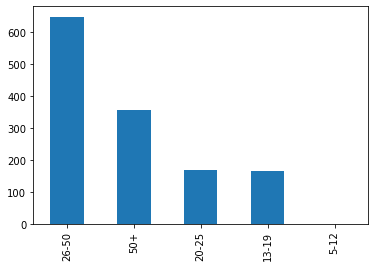

In [11]:
_ = df["age_range"].value_counts().plot(kind = "bar")

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,age_range,charges
0,19,female,27.900,0,yes,southwest,13-19,16884.92400
1,18,male,33.770,1,no,southeast,13-19,1725.55230
2,28,male,33.000,3,no,southeast,26-50,4449.46200
3,33,male,22.705,0,no,northwest,26-50,21984.47061
4,32,male,28.880,0,no,northwest,26-50,3866.85520


# Label Encoding the Categorized Variables

In [13]:
#Label Encoding..

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["sex"] = le.fit_transform(df["sex"])
df["region"] = le.fit_transform(df["region"])
df["smoker"] = le.fit_transform(df["smoker"])

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,age_range,charges
0,19,0,27.900,0,1,3,13-19,16884.92400
1,18,1,33.770,1,0,2,13-19,1725.55230
2,28,1,33.000,3,0,2,26-50,4449.46200
3,33,1,22.705,0,0,1,26-50,21984.47061
4,32,1,28.880,0,0,1,26-50,3866.85520


# Correlation Check to see what Features are impacting the Label

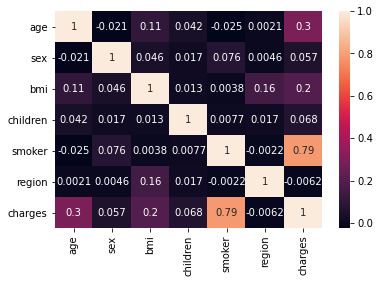

In [15]:
corr_val = df.corr()
df_features = corr_val.index
sns.heatmap(df[df_features].corr(), annot= True)

In [16]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


# Scatterplot between the Charges and BMI with respect to Age

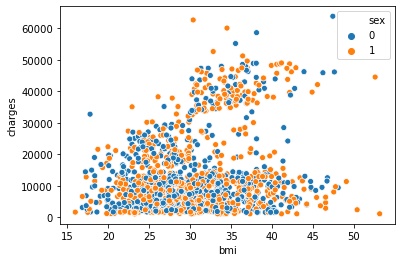

In [17]:
sns.scatterplot(df["bmi"],df["charges"], hue=df["sex"])

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,age_range,charges
0,19,0,27.900,0,1,3,13-19,16884.92400
1,18,1,33.770,1,0,2,13-19,1725.55230
2,28,1,33.000,3,0,2,26-50,4449.46200
3,33,1,22.705,0,0,1,26-50,21984.47061
4,32,1,28.880,0,0,1,26-50,3866.85520


In [19]:
X = df[["age","sex","bmi","children","smoker"]]
y = df["charges"]

In [20]:
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [21]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [22]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

# Linear Regression Algorithm

In [23]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 100)

In [25]:
linear_model.fit(X_train, y_train)
y_linear_predict = linear_model.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
score_linear = r2_score(y_test, y_linear_predict)
score_linear

0.7808508117645389

# Random Forest Regressor Algorithm

In [27]:
values = {
    "n_estimators" : [50,100,150,200,250,300,400,500],
    "criterion" : ["mse", "mae"],
    "max_depth" : [2,4,6,8],
    "min_samples_split" : [2,4,6],
    "max_features" : ["auto", "sqrt", "log2"],
    "min_impurity_decrease" : [0,0.05,0.1,0.15]
}

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [29]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=values, cv= 5)

In [30]:
def timer(start_time):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("Time taken is %i hours, %i minutes and %s seconds" % (thour, tmin, round(tsec, 2)))

In [31]:
from datetime import datetime
start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)

Time taken is 0 hours, 1 minutes and 23.76 seconds


In [32]:
random_search.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=6, min_impurity_decrease=0.15,
                      min_samples_split=4, n_estimators=150)

In [33]:
random_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 4,
 'min_impurity_decrease': 0.15,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'mae'}

In [46]:
rf_reg = RandomForestRegressor(criterion='mae', max_depth=6, min_impurity_decrease=0.15,
                      min_samples_split=4, n_estimators=150)

In [47]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf_reg, X_train, y_train, cv= 10)
score

array([0.89576396, 0.54853561, 0.88700897, 0.8690847 , 0.8685224 ,
       0.758172  , 0.777064  , 0.87249831, 0.87227254, 0.92902561])

In [48]:
score.mean()

0.8277948089759853

In [53]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=6, min_impurity_decrease=0.15,
                      min_samples_split=4, n_estimators=150)

In [54]:
rf_reg_pred = rf_reg.predict(X_test)

In [55]:
from sklearn.metrics import r2_score
score_rf = r2_score(y_test, rf_reg_pred)
score_rf

0.8781295156368597